# Desafio: Previsão de Nota de Matemática do ENEM 2016

## Importando bibliotecas: 

In [1]:
# Inicialmente vamos importar as bibliotecas necessárias.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('whitegrid')

# Setar a opção para visualizar todas as colunas do dataset para auxiliar na análise
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Leitura dos conjuntos de dados e análise inicial.

In [2]:
# Realizar a leitura do arquivo 'train.csv' e 'test.csv'.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Vamos verificar a intersecção das colunas dos dois arquivos, com o objetivo de verificar as possíveis variaveis que podemos utilizar.

In [3]:
colsTrain = train.columns.values;
colsTest = test.columns.values;
allCols = sorted(list(set(colsTrain) & set(colsTest)))
allCols

['CO_PROVA_CH',
 'CO_PROVA_CN',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'CO_UF_RESIDENCIA',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_DISCALCULIA',
 'IN_DISLEXIA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'IN_SABATISTA',
 'IN_SURDEZ',
 'IN_TREINEIRO',
 'NU_IDADE',
 'NU_INSCRICAO',
 'NU_NOTA_CH',
 'NU_NOTA_CN',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047',
 'SG_UF_RESIDENCIA',
 'TP_ANO_CONCLUIU',
 'TP_COR_RACA',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_ENSINO',
 'TP_ESCOLA',
 'TP_LINGUA',
 'TP_NACIONALIDADE',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_LC',
 'TP_SEXO',
 'TP_STATUS_REDACAO',
 'TP_ST_CONCLUSAO']

Vamos análisar o Dataset com as colunas selecionadas.

In [4]:
allCols.append('NU_NOTA_MT')
new_train = train[allCols]
new_train.head()

,CO_PROVA_CH,CO_PROVA_CN,CO_PROVA_LC,CO_PROVA_MT,CO_UF_RESIDENCIA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DISCALCULIA,IN_DISLEXIA,IN_GESTANTE,IN_IDOSO,IN_SABATISTA,IN_SURDEZ,IN_TREINEIRO,NU_IDADE,NU_INSCRICAO,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,SG_UF_RESIDENCIA,TP_ANO_CONCLUIU,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_ENSINO,TP_ESCOLA,TP_LINGUA,TP_NACIONALIDADE,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_SEXO,TP_STATUS_REDACAO,TP_ST_CONCLUSAO,NU_NOTA_MT
0,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,43,0,0,0,0,0,0,0,0,0,24,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,495.4,436.3,120.0,120.0,120.0,80.0,80.0,581.2,520.0,D,D,C,A,A,C,H,A,RS,4,1,NaN,NaN,1,1,1,1,1,1,M,1.0,1,399.4
1,909237ab0d84688e10c0470e2997348aff585273,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,23,0,0,0,0,0,0,0,0,0,17,2c3acac4b33ec2b195d77e7c04a2d75727fad723,544.1,474.5,140.0,120.0,120.0,120.0,80.0,599.0,580.0,A,A,B,A,A,A,NaN,A,CE,0,3,2.0,1.0,2,1,1,1,1,1,F,1.0,2,459.8
2,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,23,0,0,0,0,0,0,0,0,0,21,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,CE,0,3,NaN,NaN,1,1,1,0,0,0,F,NaN,3,NaN
3,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,33,0,0,0,0,0,0,0,0,0,25,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,RJ,9,0,NaN,NaN,1,0,1,0,0,0,F,NaN,1,NaN
4,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,13,0,0,0,0,0,0,0,0,0,28,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,AM,4,2,NaN,NaN,1,1,1,0,0,0,M,NaN,1,NaN


Em uma análise superficial podemos ver uma grande quantidade de valores como NaN, vamos verificar a quantidade total deste valores nulos.

In [5]:
((new_train.isna().sum() / len(new_train)) * 100).sort_values(ascending=False)

TP_ENSINO                 68.812819
TP_DEPENDENCIA_ADM_ESC    68.812819
Q027                      53.699927
NU_NOTA_MT                26.198106
NU_NOTA_COMP1             26.198106
NU_NOTA_COMP2             26.198106
NU_NOTA_COMP3             26.198106
NU_NOTA_COMP4             26.198106
NU_NOTA_COMP5             26.198106
NU_NOTA_REDACAO           26.198106
NU_NOTA_LC                26.198106
TP_STATUS_REDACAO         26.198106
NU_NOTA_CN                24.683176
NU_NOTA_CH                24.683176
CO_PROVA_LC                0.000000
CO_PROVA_MT                0.000000
CO_UF_RESIDENCIA           0.000000
IN_BAIXA_VISAO             0.000000
IN_CEGUEIRA                0.000000
IN_DISCALCULIA             0.000000
CO_PROVA_CN                0.000000
IN_GESTANTE                0.000000
IN_IDOSO                   0.000000
IN_SABATISTA               0.000000
IN_SURDEZ                  0.000000
IN_TREINEIRO               0.000000
NU_IDADE                   0.000000
NU_INSCRICAO               0

## Tratamento de valores nulos.

 Segundo o calendario de provas do MEC (https://www.guiadacarreira.com.br/educacao/enem/veja-o-calendario-do-enem-2016-divulgado-pelo-mec/) as provas de CH e CN ocorreram no mesmo dia, e as provas de Redação, MT e LC em outro dia, desta forma podemos remover as colunas de presença duplicadas.
 
Além disso, segundo a descrição das variáveis, existem 3 valores possíveis de presença:
 
 - 0 (Faltou à prova)
 - 1 (Presente na prova)
 - 2 (Eliminado na prova)
 
Como os valores 0 e 2 resultam na nota zero, então podemos unificar em um só.

Também temos que as notas NU_NOTA_COMPX são partes de um total que é a NU_NOTA_REDACAO, vamos remover essas colunas 

In [6]:
new_train.drop(['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5'], axis=1, inplace=True)

new_train.drop(['TP_PRESENCA_CH'], axis=1, inplace=True)

# Função de modificar valor de presença.
def Presenca(x):
    if x == 2:
        return 0
    else:
        return x

new_train['TP_PRESENCA_LC'] = new_train['TP_PRESENCA_LC'].map(lambda x:Presenca(x))
new_train['TP_PRESENCA_CN'] = new_train['TP_PRESENCA_CN'].map(lambda x:Presenca(x))

def NotaPelaPresenca(pres, nota):
    if pres == 0:
        return 0
    else:
        return nota

PresencaLC = (new_train['TP_PRESENCA_LC'] == 0)
new_train['NU_NOTA_MT'][PresencaLC] = 0
new_train['NU_NOTA_LC'][PresencaLC] = 0
new_train['NU_NOTA_REDACAO'][PresencaLC] = 0

PresencaCN = (new_train['TP_PRESENCA_CN'] == 0)
new_train['NU_NOTA_CN'][PresencaCN] = 0
new_train['NU_NOTA_CH'][PresencaCN] = 0

# Vamos verificar os novamente a porcentagem de valores NaN das colunas
((new_train.isna().sum() / len(new_train)) * 100).sort_values(ascending=False)

C:\Users\Ambra\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

TP_ENSINO                 68.812819
TP_DEPENDENCIA_ADM_ESC    68.812819
Q027                      53.699927
TP_STATUS_REDACAO         26.198106
NU_NOTA_MT                 0.000000
IN_GESTANTE                0.000000
NU_NOTA_CH                 0.000000
NU_INSCRICAO               0.000000
NU_IDADE                   0.000000
IN_TREINEIRO               0.000000
IN_SURDEZ                  0.000000
IN_SABATISTA               0.000000
IN_IDOSO                   0.000000
IN_DISCALCULIA             0.000000
IN_DISLEXIA                0.000000
NU_NOTA_LC                 0.000000
IN_CEGUEIRA                0.000000
IN_BAIXA_VISAO             0.000000
CO_UF_RESIDENCIA           0.000000
CO_PROVA_MT                0.000000
CO_PROVA_LC                0.000000
CO_PROVA_CN                0.000000
NU_NOTA_CN                 0.000000
Q001                       0.000000
NU_NOTA_REDACAO            0.000000
TP_ST_CONCLUSAO            0.000000
TP_SEXO                    0.000000
TP_PRESENCA_LC             0

Foi possível remover todos os valores NaN das notas das provas, porém ainda existem outras colunas com valores nulos.

Como estas colunas tem a característica de serem relacionadas valores categóricos com uma baixa relação com demais parâmetros, vamos excluir tais colunas da análise.

In [7]:
new_train.drop(['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027', 'TP_STATUS_REDACAO'], axis=1, inplace=True)

Vamos análise a distribuição das notas de matemática restantes.

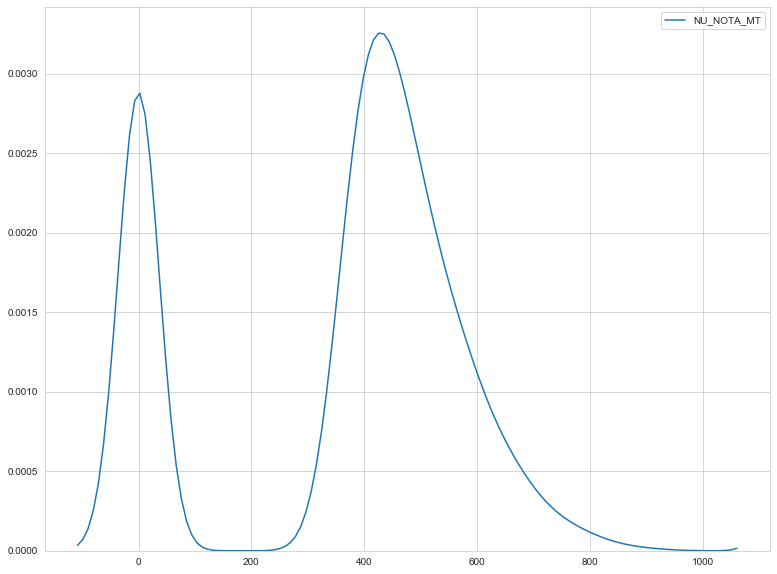

In [8]:
plt.figure(figsize=(13,10))
sns.kdeplot(new_train['NU_NOTA_MT'])

## Remover colunas com informações não relevantes.

Existem duas coluna referentes ao estado de residência do candidato, deta forma vamos remover a coluna CO_UF_RESIDENCIA.

Além disso podemos remover os códigos das prova, uma vez que a unica diferença que este faz é a ordem das questões (Segundo informações do próprio ENEM).

In [9]:
new_train.drop(['CO_UF_RESIDENCIA', 'CO_PROVA_LC', 'CO_PROVA_CH', 'CO_PROVA_MT', 'CO_PROVA_CN'], axis=1, inplace=True)
        
# Vamos verificar as informações atuais da base de dados
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IN_BAIXA_VISAO    13730 non-null  int64  
 1   IN_CEGUEIRA       13730 non-null  int64  
 2   IN_DISCALCULIA    13730 non-null  int64  
 3   IN_DISLEXIA       13730 non-null  int64  
 4   IN_GESTANTE       13730 non-null  int64  
 5   IN_IDOSO          13730 non-null  int64  
 6   IN_SABATISTA      13730 non-null  int64  
 7   IN_SURDEZ         13730 non-null  int64  
 8   IN_TREINEIRO      13730 non-null  int64  
 9   NU_IDADE          13730 non-null  int64  
 10  NU_INSCRICAO      13730 non-null  object 
 11  NU_NOTA_CH        13730 non-null  float64
 12  NU_NOTA_CN        13730 non-null  float64
 13  NU_NOTA_LC        13730 non-null  float64
 14  NU_NOTA_REDACAO   13730 non-null  float64
 15  Q001              13730 non-null  object 
 16  Q002              13730 non-null  object

C:\Users\Ambra\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Cruzando as informações do dicionário de dados com as variaáveis restante, podemos ver que muitas delas precisam ser adequadas para se encaixarem em uma função de regressão, porém temos algumas questões que apresentam campos sem informação, que podemos excluir de nossa análise, como por exemplo os campos Q001, Q002, TP_COR_RACA, TP_NACIONALIDADE e TP_ESCOLA.         

In [10]:
new_train.drop(['Q001', 'Q002', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESCOLA'], axis=1, inplace=True)

## Adequação de variáveis e análise indívidual.

Existem váriaveis que estão formatadas como categóricas que necessitam de uma conversão e criação de Dummy Variables para que possam ser utilizadas, desta forma vamos análisar elas.

C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


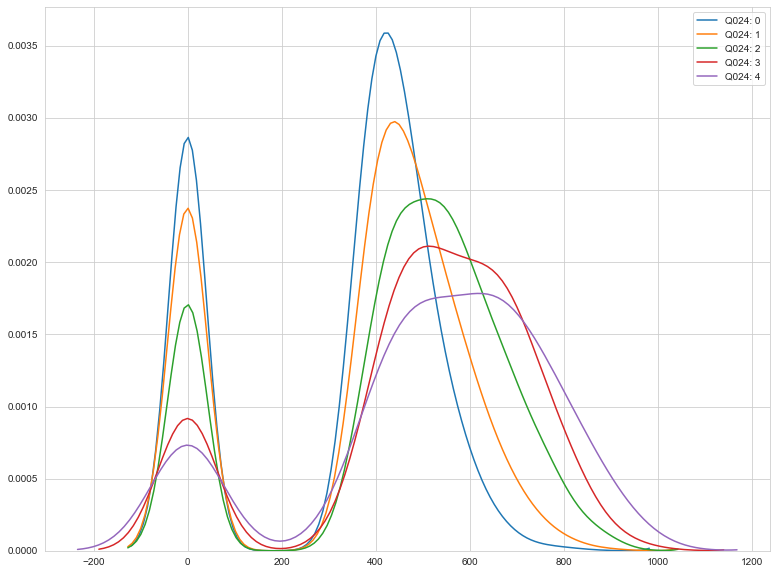

In [11]:
# Q024
def QuantComputadores(x):
    if x == 'A':
        return 0
    elif x == 'B':
        return 1
    elif x == 'C':
        return 2
    elif x == 'D':
        return 3
    else:
        return 4

new_train['Q024'] = new_train['Q024'].map(lambda x:QuantComputadores(x))

plt.figure(figsize=(13,10))
sns.kdeplot(new_train[new_train['Q024'] == 0]['NU_NOTA_MT'], label="Q024: 0")
sns.kdeplot(new_train[new_train['Q024'] == 1]['NU_NOTA_MT'], label="Q024: 1")
sns.kdeplot(new_train[new_train['Q024'] == 2]['NU_NOTA_MT'], label="Q024: 2")
sns.kdeplot(new_train[new_train['Q024'] == 3]['NU_NOTA_MT'], label="Q024: 3")
sns.kdeplot(new_train[new_train['Q024'] == 4]['NU_NOTA_MT'], label="Q024: 4")
plt.legend();

C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


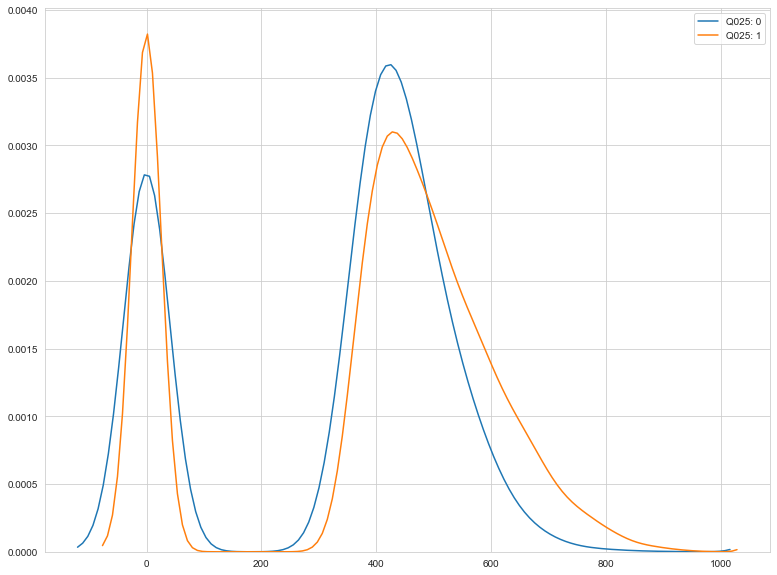

In [12]:
# Q025
def PossuiInternet(x):
    if x == 'A':
        return 0
    else:
        return 1

new_train['Q025'] = new_train['Q025'].map(lambda x:PossuiInternet(x))

plt.figure(figsize=(13,10))
sns.kdeplot(new_train[new_train['Q025'] == 0]['NU_NOTA_MT'], label="Q025: 0")
sns.kdeplot(new_train[new_train['Q025'] == 1]['NU_NOTA_MT'], label="Q025: 1")
plt.legend();

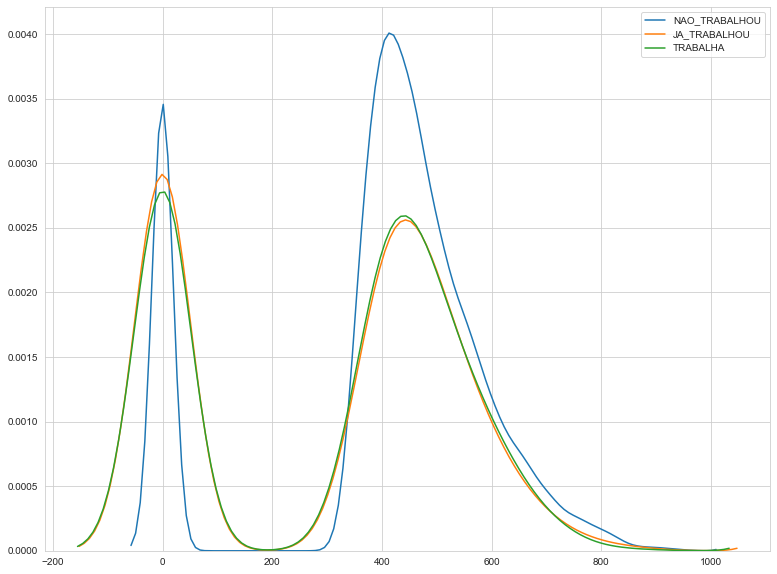

In [13]:
# Q026
trabalhou = pd.get_dummies(new_train['Q026'])
trabalhou.columns = ['NAO_TRABALHOU', 'JA_TRABALHOU', 'TRABALHA']
trabalhou.drop(trabalhou.columns[-1],axis=1,inplace=True)
new_train = pd.concat([new_train, trabalhou], axis=1, sort=False)

plt.figure(figsize=(13,10))
sns.kdeplot(new_train[new_train['NAO_TRABALHOU'] == 1]['NU_NOTA_MT'], label="NAO_TRABALHOU")
sns.kdeplot(new_train[new_train['JA_TRABALHOU'] == 1]['NU_NOTA_MT'], label="JA_TRABALHOU")
sns.kdeplot(new_train[(new_train['NAO_TRABALHOU'] != 1) & (new_train['JA_TRABALHOU'] != 1)]['NU_NOTA_MT'], label="TRABALHA")
plt.legend();

new_train.drop(['Q026', 'NAO_TRABALHOU','JA_TRABALHOU'], axis=1, inplace=True)

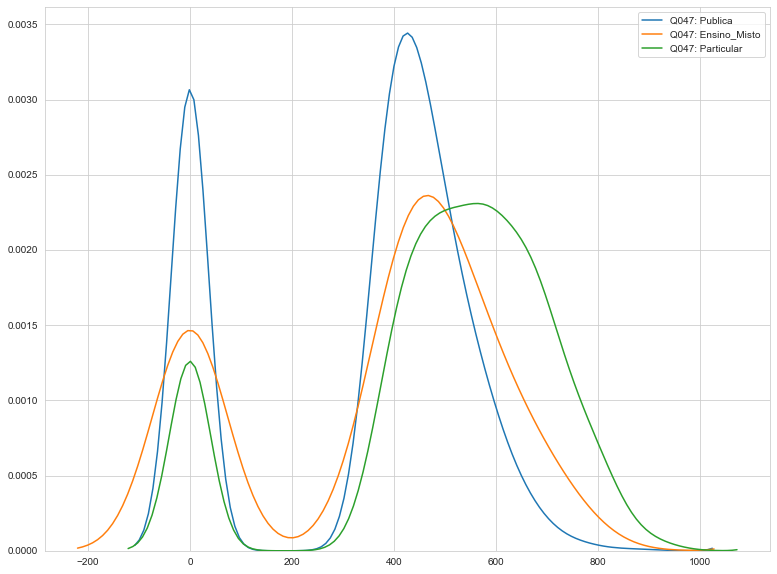

In [14]:
# Q047
def JuntarEscolaridadeComBolsa(x):
    if x == 'A':
        return 'Publica'
    elif (x == 'B' or x == 'C'):
        return 'Ensino_Misto'
    else :
        return 'Particular'

new_train['Q047'] = new_train['Q047'].map(lambda x:JuntarEscolaridadeComBolsa(x))

plt.figure(figsize=(13,10))
sns.kdeplot(new_train[new_train['Q047'] == 'Publica']['NU_NOTA_MT'], label="Q047: Publica")
sns.kdeplot(new_train[new_train['Q047'] == 'Ensino_Misto']['NU_NOTA_MT'], label="Q047: Ensino_Misto")
sns.kdeplot(new_train[new_train['Q047'] == 'Particular']['NU_NOTA_MT'], label="Q047: Particular")
plt.legend();

# As pessoas que estudaram em escola particular apresentam um decaimento mais suave que as demais, 
# desta forma é interessante levar essa informação em consideração
ensino = pd.get_dummies(new_train['Q047'])
ensino.drop(ensino.columns[-1],axis=1,inplace=True)
new_train.drop(['Q047'], axis=1, inplace=True)
new_train = pd.concat([new_train, ensino], axis=1, sort=False)

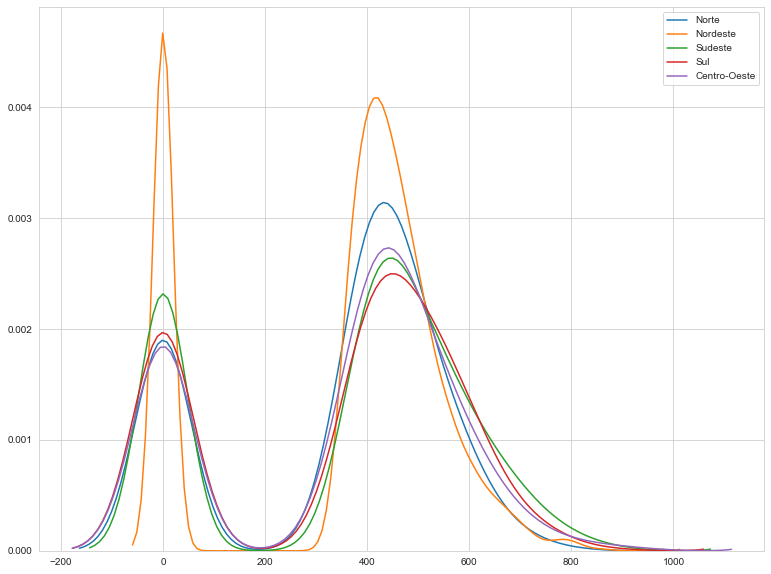

In [15]:
# Vamos separar os candidatos por região para facilitar a análise
Norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'TO']
Nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
Sudeste = ['ES', 'MG', 'RJ', 'SP']
Sul = ['PR', 'RS', 'SC']

def UnirPorRegiao(x):
    if x in Norte:
        return 'Norte'
    elif x in Nordeste:
        return 'Nordeste'
    elif x in Sudeste:
        return 'Sudeste'
    elif x in Sul:
        return 'Sul'
    else: 
        return 'Centro-Oeste'

new_train['SG_UF_RESIDENCIA'] = new_train['SG_UF_RESIDENCIA'].map(lambda x:UnirPorRegiao(x))

plt.figure(figsize=(13,10))
sns.kdeplot(new_train[new_train['SG_UF_RESIDENCIA'] == 'Norte']['NU_NOTA_MT'], label="Norte")
sns.kdeplot(new_train[new_train['SG_UF_RESIDENCIA'] == 'Nordeste']['NU_NOTA_MT'], label="Nordeste")
sns.kdeplot(new_train[new_train['SG_UF_RESIDENCIA'] == 'Sudeste']['NU_NOTA_MT'], label="Sudeste")
sns.kdeplot(new_train[new_train['SG_UF_RESIDENCIA'] == 'Sul']['NU_NOTA_MT'], label="Sul")
sns.kdeplot(new_train[new_train['SG_UF_RESIDENCIA'] == 'Centro-Oeste']['NU_NOTA_MT'], label="Centro-Oeste")
plt.legend();

# Podemos ver que quanto mais ao Sul da região, a curva tem um decaimento mais suave.
regiao = pd.get_dummies(new_train['SG_UF_RESIDENCIA'])
regiao.drop(regiao.columns[-1],axis=1,inplace=True)
new_train.drop(['SG_UF_RESIDENCIA'], axis=1, inplace=True)

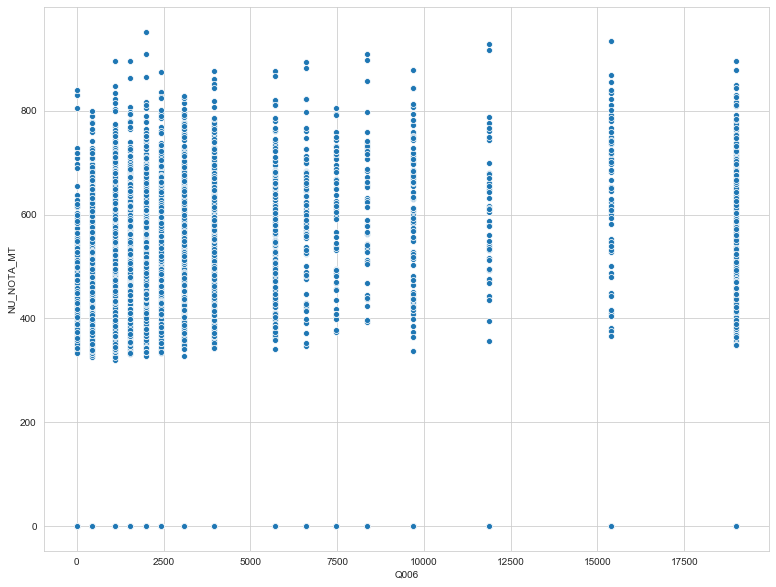

In [16]:
# Com relação a renda mensal de cada pessoa, vamos usar a média da renda selecionada para criar valores continuos
def RendaValorMedio(x):
    if x == 'A':
        return 0
    elif x == 'B':
        return 440
    elif x == 'C':
        return 1100
    elif x == 'D':
        return 1540
    elif x == 'E':
        return 1980
    elif x == 'F':
        return 2420
    elif x == 'G':
        return 3080
    elif x == 'H':
        return 3960
    elif x == 'H':
        return 4840
    elif x == 'J':
        return 5720
    elif x == 'K':
        return 6600
    elif x == 'L':
        return 7480
    elif x == 'M':
        return 8360
    elif x == 'N':
        return 9680
    elif x == 'O':
        return 11880
    elif x == 'P':
        return 15400
    else: 
        return 19000

new_train['Q006'] = new_train['Q006'].map(lambda x:RendaValorMedio(x))

plt.figure(figsize=(13,10))
sns.scatterplot(new_train['Q006'], new_train['NU_NOTA_MT'])

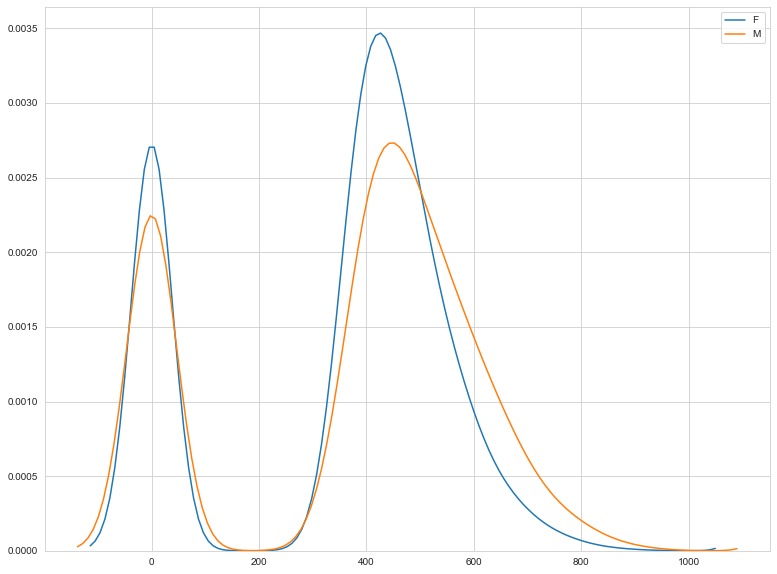

In [17]:
# Converter sexo para binario 
def SexoTipo(x):
    if x == 'F':
        return 0
    else:
        return 1

new_train['TP_SEXO'] = new_train['TP_SEXO'].map(lambda x:SexoTipo(x))
plt.figure(figsize=(13,10))
sns.kdeplot(new_train[new_train['TP_SEXO'] == 0]['NU_NOTA_MT'], label="F")
sns.kdeplot(new_train[new_train['TP_SEXO'] == 1]['NU_NOTA_MT'], label="M")
plt.legend();

In [18]:
# Como todos os resultados foram negativos, convém remover esta coluna de nossa análise, pois não trará nenhuma informação
new_train.drop(['IN_CEGUEIRA'], axis=1, inplace=True)

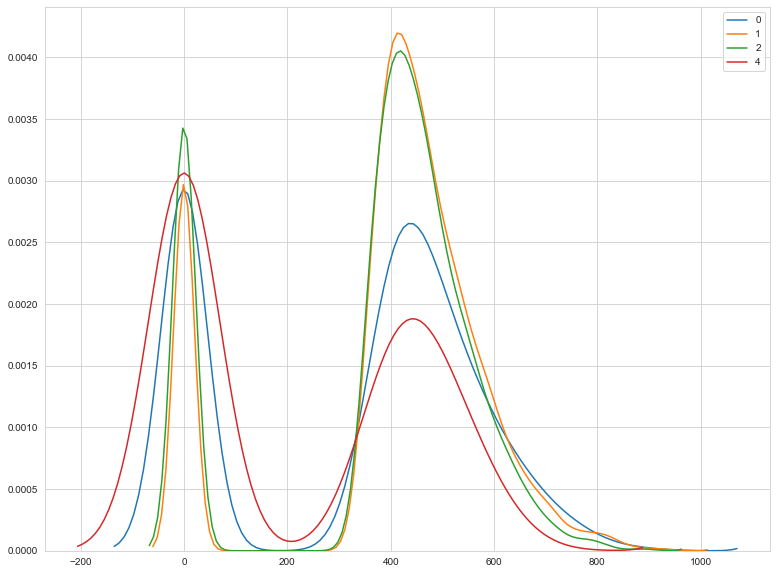

In [19]:
emconclusao = pd.get_dummies(new_train['TP_ST_CONCLUSAO'])
emconclusao.columns = ['EM_CONCLUSAO_0', 'EM_CONCLUSAO_1', 'EM_CONCLUSAO_2', 'EM_CONCLUSAO_3']
emconclusao.drop(emconclusao.columns[-1],axis=1,inplace=True)
new_train = pd.concat([new_train, emconclusao], axis=1, sort=False)

plt.figure(figsize=(13,10))
sns.kdeplot(new_train[new_train['EM_CONCLUSAO_0'] == 1]['NU_NOTA_MT'], label="0")
sns.kdeplot(new_train[new_train['EM_CONCLUSAO_1'] == 1]['NU_NOTA_MT'], label="1")
sns.kdeplot(new_train[new_train['EM_CONCLUSAO_2'] == 1]['NU_NOTA_MT'], label="2")
sns.kdeplot(new_train[(new_train['EM_CONCLUSAO_0'] != 1) & (new_train['EM_CONCLUSAO_1'] != 1) & (new_train['EM_CONCLUSAO_2'] != 1)]['NU_NOTA_MT'], label="4")
plt.legend();

new_train.drop(['TP_ST_CONCLUSAO', 'EM_CONCLUSAO_0','EM_CONCLUSAO_1','EM_CONCLUSAO_2'], axis=1, inplace=True)

In [20]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IN_BAIXA_VISAO   13730 non-null  int64  
 1   IN_DISCALCULIA   13730 non-null  int64  
 2   IN_DISLEXIA      13730 non-null  int64  
 3   IN_GESTANTE      13730 non-null  int64  
 4   IN_IDOSO         13730 non-null  int64  
 5   IN_SABATISTA     13730 non-null  int64  
 6   IN_SURDEZ        13730 non-null  int64  
 7   IN_TREINEIRO     13730 non-null  int64  
 8   NU_IDADE         13730 non-null  int64  
 9   NU_INSCRICAO     13730 non-null  object 
 10  NU_NOTA_CH       13730 non-null  float64
 11  NU_NOTA_CN       13730 non-null  float64
 12  NU_NOTA_LC       13730 non-null  float64
 13  NU_NOTA_REDACAO  13730 non-null  float64
 14  Q006             13730 non-null  int64  
 15  Q024             13730 non-null  int64  
 16  Q025             13730 non-null  int64  
 17  TP_ANO_CONCL

## Análisar correlação entre variáveis

Vamos selecionar as variáveis que iremos utilizar baseado na correlação entre as variaveis e a nota de matemática do candidato. Também será levada em consideração a análise realizada anteriormente com as variaveis categóricas.

In [21]:
new_train = new_train.reindex(sorted(new_train.columns), axis=1)

# Vamos verificar a correlação das colunas restantes
new_train.corr().loc[['NU_NOTA_MT']]

,Ensino_Misto,IN_BAIXA_VISAO,IN_DISCALCULIA,IN_DISLEXIA,IN_GESTANTE,IN_IDOSO,IN_SABATISTA,IN_SURDEZ,IN_TREINEIRO,NU_IDADE,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Particular,Q006,Q024,Q025,TP_ANO_CONCLUIU,TP_LINGUA,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_SEXO
NU_NOTA_MT,0.009964,-0.006546,0.008392,0.005259,-0.028129,-0.009061,-0.002457,-0.002617,0.078804,-0.240874,0.903608,0.907039,0.943954,1.0,0.875929,0.220842,0.185418,0.17403,0.116122,-0.191553,-0.111428,0.879128,0.927129,0.061068


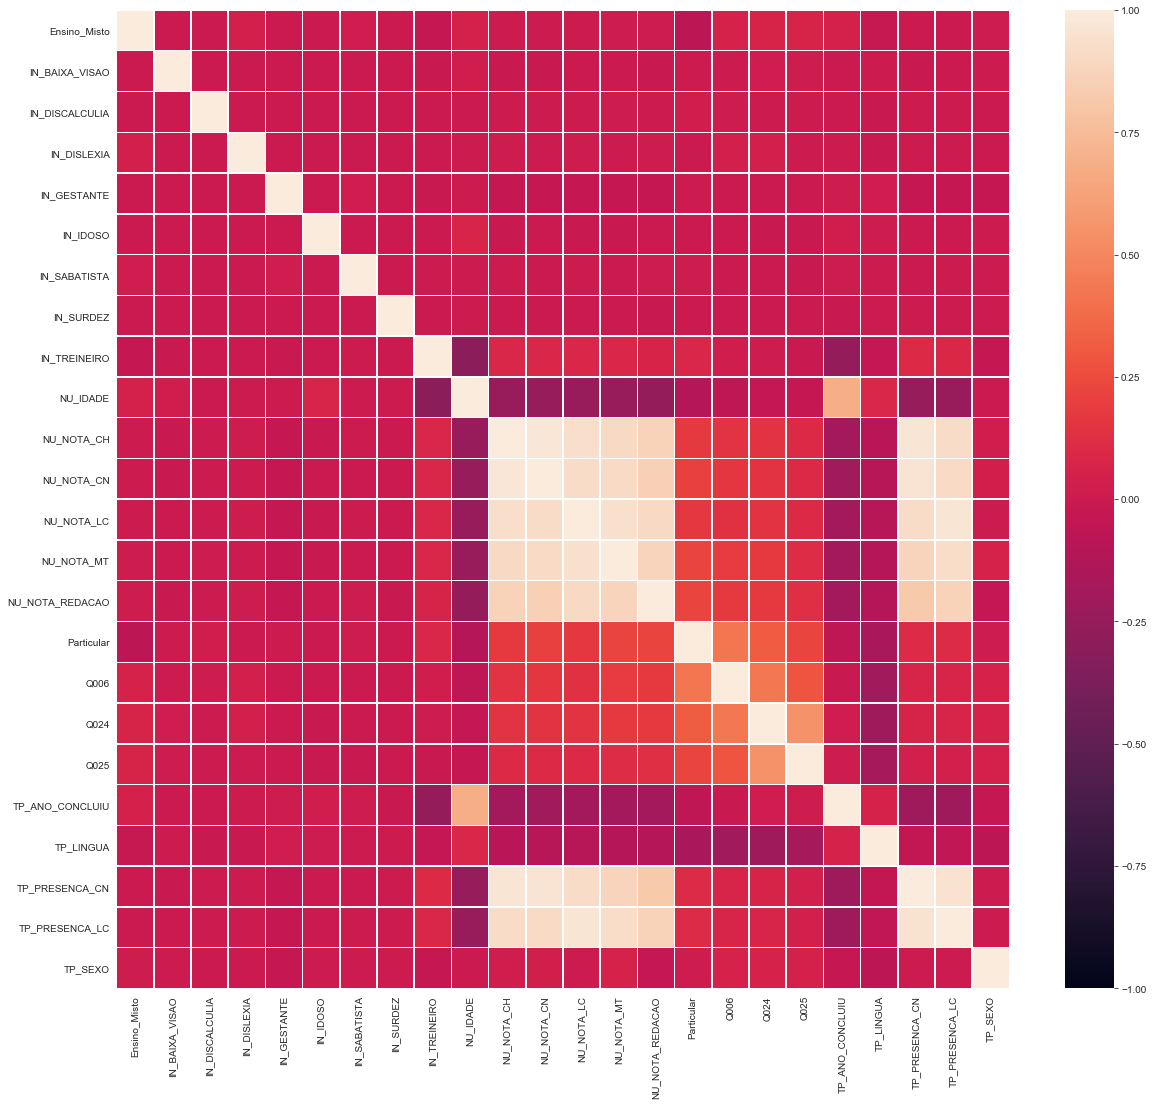

In [22]:
# Vamos verificar o Heatmap desse dataset resultante
plt.figure(figsize=(20,18))
sns.heatmap(new_train.corr(), vmin=-1, vmax=1, linewidths=.5)

Vamos remover as colunas que apresentam correlação maior que 0.9 e menor que -0.9.

In [23]:
new_train.drop(['IN_BAIXA_VISAO', 'IN_DISCALCULIA','IN_DISLEXIA','IN_GESTANTE','IN_IDOSO',
                'IN_SABATISTA','IN_SURDEZ','IN_TREINEIRO','NU_IDADE','TP_ANO_CONCLUIU', 'Ensino_Misto',
               'Q025','TP_ANO_CONCLUIU','TP_LINGUA','TP_SEXO', 'Particular','Q006','Q024','TP_PRESENCA_CN','NU_NOTA_REDACAO'], axis=1, inplace=True)

## Normalização de dados e ajustes finais no conjunto.

Agora que removemos as colunas indesejadas, necessitamos normalizar os valores e separarmos entre X e y.

In [24]:
X = new_train.drop(['NU_NOTA_MT', 'NU_INSCRICAO'],axis=1)
y = new_train['NU_NOTA_MT']

Vamos ajustar o dataset de Teste para o mesmo padrão do dataset de treino.

In [25]:
test['TP_PRESENCA_LC'] = test['TP_PRESENCA_LC'].map(lambda x:Presenca(x))
test['TP_PRESENCA_CN'] = test['TP_PRESENCA_CN'].map(lambda x:Presenca(x))

PresencaLC = (test['TP_PRESENCA_LC'] == 0)
test['NU_NOTA_LC'][PresencaLC] = 0
test['NU_NOTA_REDACAO'][PresencaLC] = 0

PresencaCN = (test['TP_PRESENCA_CN'] == 0)
test['NU_NOTA_CN'][PresencaCN] = 0
test['NU_NOTA_CH'][PresencaCN] = 0

new_test = test[['NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'TP_PRESENCA_LC']]

C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:

## Selecionar melhor algoritmo de Regressão

Vamos testar os algoritmos de regressão com subconjuntos do conjunto de treino. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
methods = []
methods.append(('LR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))
methods.append(('KNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
methods.append(('GBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))
methods.append(('RFR', Pipeline([('Scaler', MinMaxScaler()),('RFR', RandomForestRegressor())])))

def verificarPerformace(pipelines,X_train,y_train):
    results = []
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=5, random_state=21, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        
verificarPerformace(methods, X_train, y_train)

Os melhores algoritmos selecionados foram GradientBoostingRegressor e RandomForestRegressor, então vamos utilizar os dois para prever nossos resultados no dataset de teste.

## Previsão dos valores no conjunto de teste.

In [28]:
GBMPipeline = Pipeline([('Scaler',  StandardScaler()), ('GradientBoostingRegressor', GradientBoostingRegressor())])
RFRPipeline = Pipeline([('Scaler',  StandardScaler()), ('RandomForestRegressor', RandomForestRegressor())])

In [29]:
CV_pipe_GBM = RandomizedSearchCV(estimator = GBMPipeline, param_distributions = {},cv = 5,return_train_score=True, verbose=0)
CV_pipe_RFR = RandomizedSearchCV(estimator = RFRPipeline, param_distributions = {},cv = 5,return_train_score=True, verbose=0)

In [30]:
CV_pipe_GBM.fit(X, y)
predictedGBM = CV_pipe_GBM.predict(new_test)

CV_pipe_RFR.fit(X, y)
predictedRFR = CV_pipe_RFR.predict(new_test)

C:\Users\Ambra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Ambra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [31]:
test['NU_NOTA_MT'] = predictedGBM
ScorePerson = test[['NU_INSCRICAO', 'NU_NOTA_MT']]
ScorePerson['NU_NOTA_MT'] = np.around(ScorePerson['NU_NOTA_MT'],2)

# Exportar resultado GBM:
ScorePerson.to_csv('answer.csv', index=False)

C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## SCORE CODENATION: 92.21%

In [32]:
test['NU_NOTA_MT'] = predictedRFR
ScorePerson = test[['NU_INSCRICAO', 'NU_NOTA_MT']]
ScorePerson['NU_NOTA_MT'] = np.around(ScorePerson['NU_NOTA_MT'],2)

# Exportar resultado RFR:
ScorePerson.to_csv('answer2.csv', index=False)

C:\Users\Ambra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## SCORE CODENATION: 91.87%